In [68]:
import numpy as np

from _graphtools import *
from _vectools import * 

from scipy.linalg import expm
import tqdm as tqdm
np.set_printoptions(precision=3,suppress=True)


In [69]:
#neck = gen_necklace(4)
neck = (1, 6, 5, 2, 7, 4, 3, 8)

In [70]:
X = [2,2]
AFB = 2*np.pi/X[0]

ftree = fluxedTree(X)
ftree.construct_fluxed()
rand = generate_random_cycle_graph(ftree,neck)
half_rand = generate_half_rgc(ftree,neck)

rand.construct_fluxed()
rand.construct_adj()

half_rand.construct_fluxed()
half_rand.construct_adj()

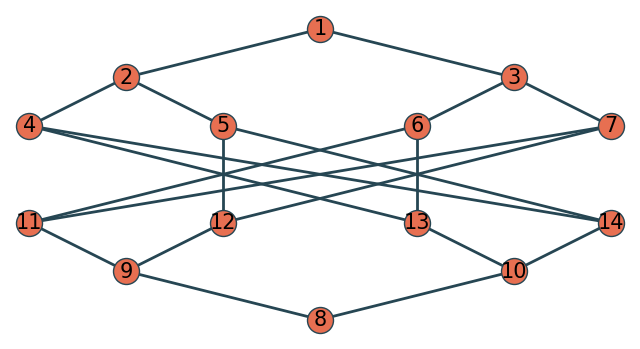

In [71]:
fig, axes = plt.subplots(1, 1, figsize=(8, 8))  # adjust figsize as needed

pl_graph(axes, rand, positions=rand_cycle_coords(X,xd=3,yd=1,spacing=1), vertex_size=350,outline_weight = 1, edge_weight=2,margin=.2)

plt.show()

In [72]:
# Define the time array over which evolution is evaluated
t = np.linspace(0, 20, 1000)
delta_t = t[1]
U_bare = expm(-1j * rand.weighted_adj(0) * delta_t)
U_half_bare = expm(-1j * rand.weighted_adj(2*np.pi) * delta_t)


N = np.shape(rand.adj)[0]
psi_i = e_n(0, N)
end = e_n(tree_mag(X), N)


prob_bare = [0]
psi_curr_bare = e_n(0, N)

prob_half_bare = [0]
psi_curr_half_bare = e_n(0, N)

# Use tqdm to show progress for each time step
for time in tqdm.tqdm(t[1:], desc=f"Processing time steps", unit="time step"):
    psi_curr_bare = U_bare@psi_curr_bare
    prob_bare.append(np.abs(end.conj() @ psi_curr_bare)**2)

    psi_curr_half_bare = U_half_bare@psi_curr_half_bare
    prob_half_bare.append(np.abs(end.conj() @ psi_curr_half_bare)**2)

Processing time steps: 100%|██████████| 999/999 [00:00<00:00, 115398.23time step/s]


Text(0.5, 1.0, '(1, 6, 5, 2, 7, 4, 3, 8)')

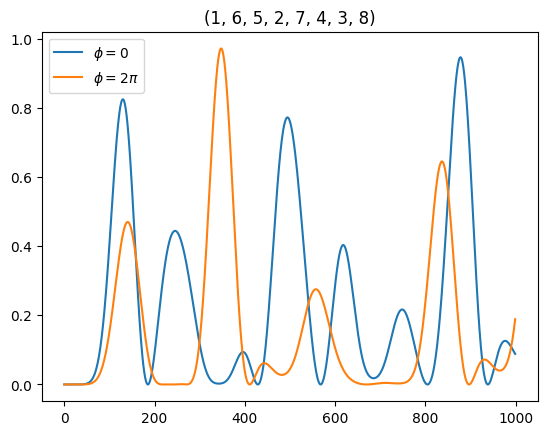

In [73]:
plt.plot(prob_bare,label=r"$\phi=0$")
plt.plot(prob_half_bare,label=r"$\phi=2\pi$")
plt.legend()

plt.title(neck)

In [74]:
_, eigvecs = np.linalg.eigh(prob_half_bare)

LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

Processing time steps: 100%|██████████| 999/999 [00:00<00:00, 146272.07time step/s]


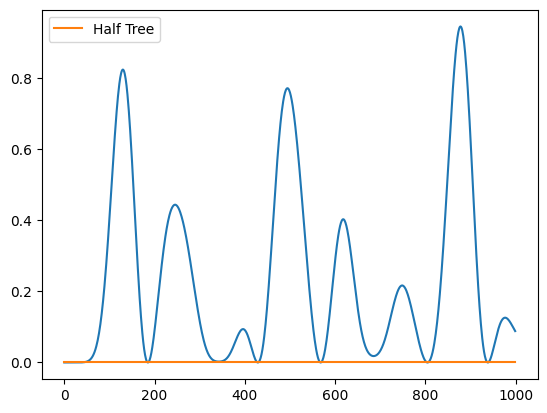

In [66]:
# Define the time array over which evolution is evaluated
t = np.linspace(0, 20, 1000)
delta_t = t[1]
U_bare = expm(-1j * rand.weighted_adj(0) * delta_t)
U_half_bare = expm(-1j * half_rand.weighted_adj(2*np.pi) * delta_t)


N = np.shape(rand.adj)[0]
psi_i = e_n(0, N)
end = e_n(tree_mag(X), N)


prob_bare = [0]
psi_curr_bare = e_n(0, N)

prob_half_bare = [0]
psi_curr_half_bare = e_n(0, N)

# Use tqdm to show progress for each time step
for time in tqdm.tqdm(t[1:], desc=f"Processing time steps", unit="time step"):
    psi_curr_bare = U_bare@psi_curr_bare
    prob_bare.append(np.abs(end.conj() @ psi_curr_bare)**2)

    psi_curr_half_bare = U_half_bare@psi_curr_half_bare
    prob_half_bare.append(np.abs(end.conj() @ psi_curr_half_bare)**2)

plt.plot(prob_bare)
plt.plot(prob_half_bare,label="Half Tree")

plt.legend()